In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

## Imports

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Reading the File and Preprocessing

**You only need to run the section `Reading the File` once.**

**For the next times, you can skip it and start from the next section `Preprocessing & EDA`.**

In [3]:
file_path = 'data/complete_dataset.xlsx'
df = pd.read_excel(file_path)

In [25]:
df.shape

(8624, 26)

In [26]:
df.head()

,timeDuration,nMovements,movementsDifficulty,robotSpeech,acrobaticMovements,movementsRepetition,musicGenre,movementsTransitionsDuration,humanMovements,balance,...,handsMovement,legsMovement,feetMovement,EvaluationChoreographyStoryTelling,EvaluationChoreographyRhythm,EvaluationChoreographyMovementTechnique,EvaluationChoreographyPublicInvolvement,EvaluationChoreographySpaceUse,EvaluationChoreographyHumanCharacterization,EvaluationChoreographyHumanReproducibility
0,140,20,2,0,2,1,folk,1,2,1,...,1,2,2,2,2,2,1,2,2,3
1,115,21,2,0,3,1,folk,2,3,2,...,2,3,2,3,3,3,3,3,3,2
2,110,20,2,0,3,2,folk,2,3,2,...,2,3,2,1,1,1,1,1,1,1
3,100,19,1,0,1,1,electronic,1,1,1,...,1,2,1,1,2,2,2,2,2,2
4,125,20,3,0,3,2,electronic,2,3,3,...,2,3,2,1,1,1,1,1,1,3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   timeDuration                                 8624 non-null   int64 
 1   nMovements                                   8624 non-null   int64 
 2   movementsDifficulty                          8624 non-null   int64 
 3   robotSpeech                                  8624 non-null   int64 
 4   acrobaticMovements                           8624 non-null   int64 
 5   movementsRepetition                          8624 non-null   int64 
 6   musicGenre                                   8624 non-null   object
 7   movementsTransitionsDuration                 8624 non-null   int64 
 8   humanMovements                               8624 non-null   int64 
 9   balance                                      8624 non-null   int64 
 10  speed       

In the column `musicGenre` some cells were with capital letters. To avoid more columns for similar music categories in one-hot encoded, it is needed to have all the letters in the same format.

In [28]:
df['musicGenre'] = df['musicGenre'].str.lower().str.strip()
df = df.drop_duplicates()

In [29]:
df.shape

(8563, 26)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timeDuration,8563.0,120.936354,66.453420,70.0,105.0,115.0,127.0,1132.0
nMovements,8563.0,17.441084,3.411733,8.0,15.0,18.0,20.0,24.0
movementsDifficulty,8563.0,1.962980,0.796458,1.0,1.0,2.0,3.0,3.0
robotSpeech,8563.0,0.485344,0.499814,0.0,0.0,0.0,1.0,1.0
acrobaticMovements,8563.0,1.906341,0.831583,1.0,1.0,2.0,3.0,3.0
movementsRepetition,8563.0,2.003503,0.813192,1.0,1.0,2.0,3.0,3.0
movementsTransitionsDuration,8563.0,1.736424,0.718991,1.0,1.0,2.0,2.0,3.0
humanMovements,8563.0,2.043326,0.826938,1.0,1.0,2.0,3.0,3.0
balance,8563.0,2.004905,0.823887,1.0,1.0,2.0,3.0,3.0
speed,8563.0,1.953638,0.808200,1.0,1.0,2.0,3.0,3.0


In [31]:
ordinal_cols = [
    'movementsDifficulty','acrobaticMovements','movementsRepetition',
    'humanMovements','balance','speed','bodyPartsCombination',
    'headMovement','armsMovement','handsMovement','legsMovement','feetMovement'
]

for col in ordinal_cols:
    counts = df[col].value_counts().sort_index()
    counts_str = ", ".join(f"{level}: {count}" for level, count in counts.items())
    print(f"{col} value counts\n{counts_str}\n")

movementsDifficulty value counts
1: 2880, 2: 3120, 3: 2563

acrobaticMovements value counts
1: 3399, 2: 2567, 3: 2597

movementsRepetition value counts
1: 2816, 2: 2901, 3: 2846

humanMovements value counts
1: 2750, 2: 2692, 3: 3121

balance value counts
1: 2885, 2: 2751, 3: 2927

speed value counts
1: 3004, 2: 2952, 3: 2607

bodyPartsCombination value counts
1: 2757, 2: 2813, 3: 2993

headMovement value counts
1: 2997, 2: 2717, 3: 2849

armsMovement value counts
1: 2657, 2: 2670, 3: 3236

handsMovement value counts
1: 2855, 2: 3182, 3: 2526

legsMovement value counts
1: 2715, 2: 2764, 3: 3084

feetMovement value counts
1: 3048, 2: 3099, 3: 2416



In [32]:
df["musicGenre"].value_counts()

musicGenre
folk          1590
electronic    1546
rock          1524
pop            914
classical      885
latin          845
indie          630
rap            629
Name: count, dtype: int64

The first music category (classical) is omitted in one-hot encoded by using `drop_first=True`.

In [33]:
df = pd.get_dummies(df, columns=['musicGenre'], dtype=int, drop_first=True)
genre_cols = [c for c in df.columns if c.startswith('musicGenre_')]
print("Music-genre dummy columns:", genre_cols)
print(df[genre_cols].sum().sort_values(ascending=False))

Music-genre dummy columns: ['musicGenre_electronic', 'musicGenre_folk', 'musicGenre_indie', 'musicGenre_latin', 'musicGenre_pop', 'musicGenre_rap', 'musicGenre_rock']
musicGenre_folk          1590
musicGenre_electronic    1546
musicGenre_rock          1524
musicGenre_pop            914
musicGenre_latin          845
musicGenre_indie          630
musicGenre_rap            629
dtype: int64


In [34]:
df.head()

,timeDuration,nMovements,movementsDifficulty,robotSpeech,acrobaticMovements,movementsRepetition,movementsTransitionsDuration,humanMovements,balance,speed,...,EvaluationChoreographySpaceUse,EvaluationChoreographyHumanCharacterization,EvaluationChoreographyHumanReproducibility,musicGenre_electronic,musicGenre_folk,musicGenre_indie,musicGenre_latin,musicGenre_pop,musicGenre_rap,musicGenre_rock
0,140,20,2,0,2,1,1,2,1,1,...,2,2,3,0,1,0,0,0,0,0
1,115,21,2,0,3,1,2,3,2,2,...,3,3,2,0,1,0,0,0,0,0
2,110,20,2,0,3,2,2,3,2,2,...,1,1,1,0,1,0,0,0,0,0
3,100,19,1,0,1,1,1,1,1,1,...,2,2,2,1,0,0,0,0,0,0
4,125,20,3,0,3,2,2,3,3,2,...,1,1,3,1,0,0,0,0,0,0


## EDA

In [35]:
clean_path = 'data/cleaned_choreographies.csv'
df.to_csv(clean_path, index=False)
print("Cleaned data saved to:", clean_path)
print("\nShape after preprocessing:", df.shape)

Cleaned data saved to: data/cleaned_choreographies.csv

Shape after preprocessing: (8563, 32)


In [36]:
genre_cols = [c for c in df.columns if c.startswith('musicGenre_')]
target_cols = [
    'EvaluationChoreographyStoryTelling',
    'EvaluationChoreographyRhythm',
    'EvaluationChoreographyMovementTechnique',
    'EvaluationChoreographyPublicInvolvement',
    'EvaluationChoreographySpaceUse',
    'EvaluationChoreographyHumanCharacterization',
    'EvaluationChoreographyHumanReproducibility'
]

numeric_cols = [c for c in df.columns
                if c not in genre_cols + target_cols]
     

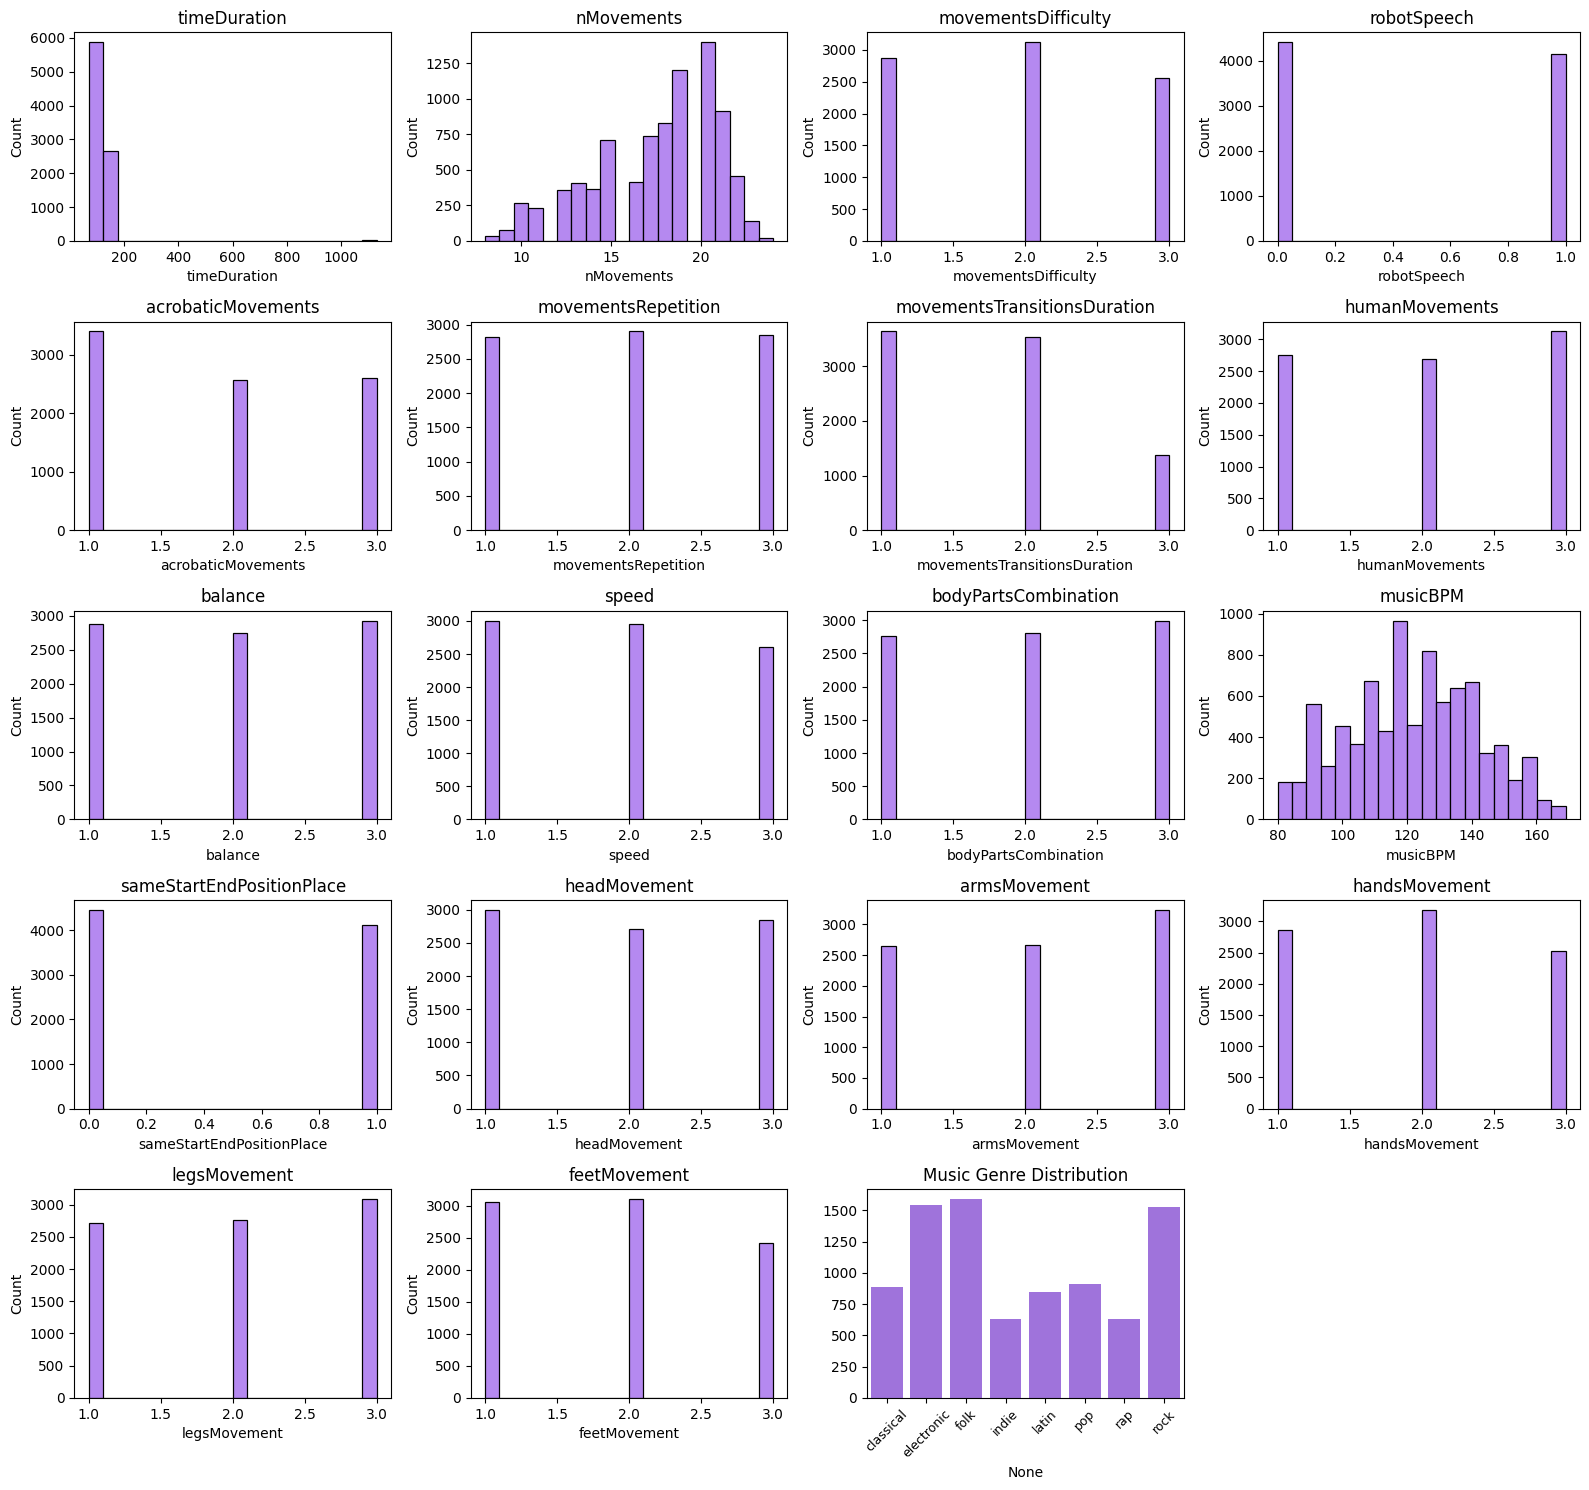

In [53]:
# Univariate HISTOGRAMS + Genre Bar
baseline_count = (df[genre_cols].sum(axis=1) == 0).sum()
genre_counts = pd.Series(
    [baseline_count] + df[genre_cols].sum().tolist(),
    index=['classical'] + genre_cols
)

total_plots = len(numeric_cols) + 1  # +1 for the genre bar
ncols = 4
nrows = math.ceil(total_plots / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.histplot(df[col], bins=20, ax=ax, kde=False,color='#9d62ec')
    ax.set_title(col)

ax = axes[len(numeric_cols)]
sns.barplot(
    x=genre_counts.index.str.replace('musicGenre_',''),
    y=genre_counts.values,
    ax=ax,
    color='#9d62ec'
)
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.set_title("Music Genre Distribution")

for ax in axes[total_plots:]:
    fig.delaxes(ax)

fig.tight_layout();

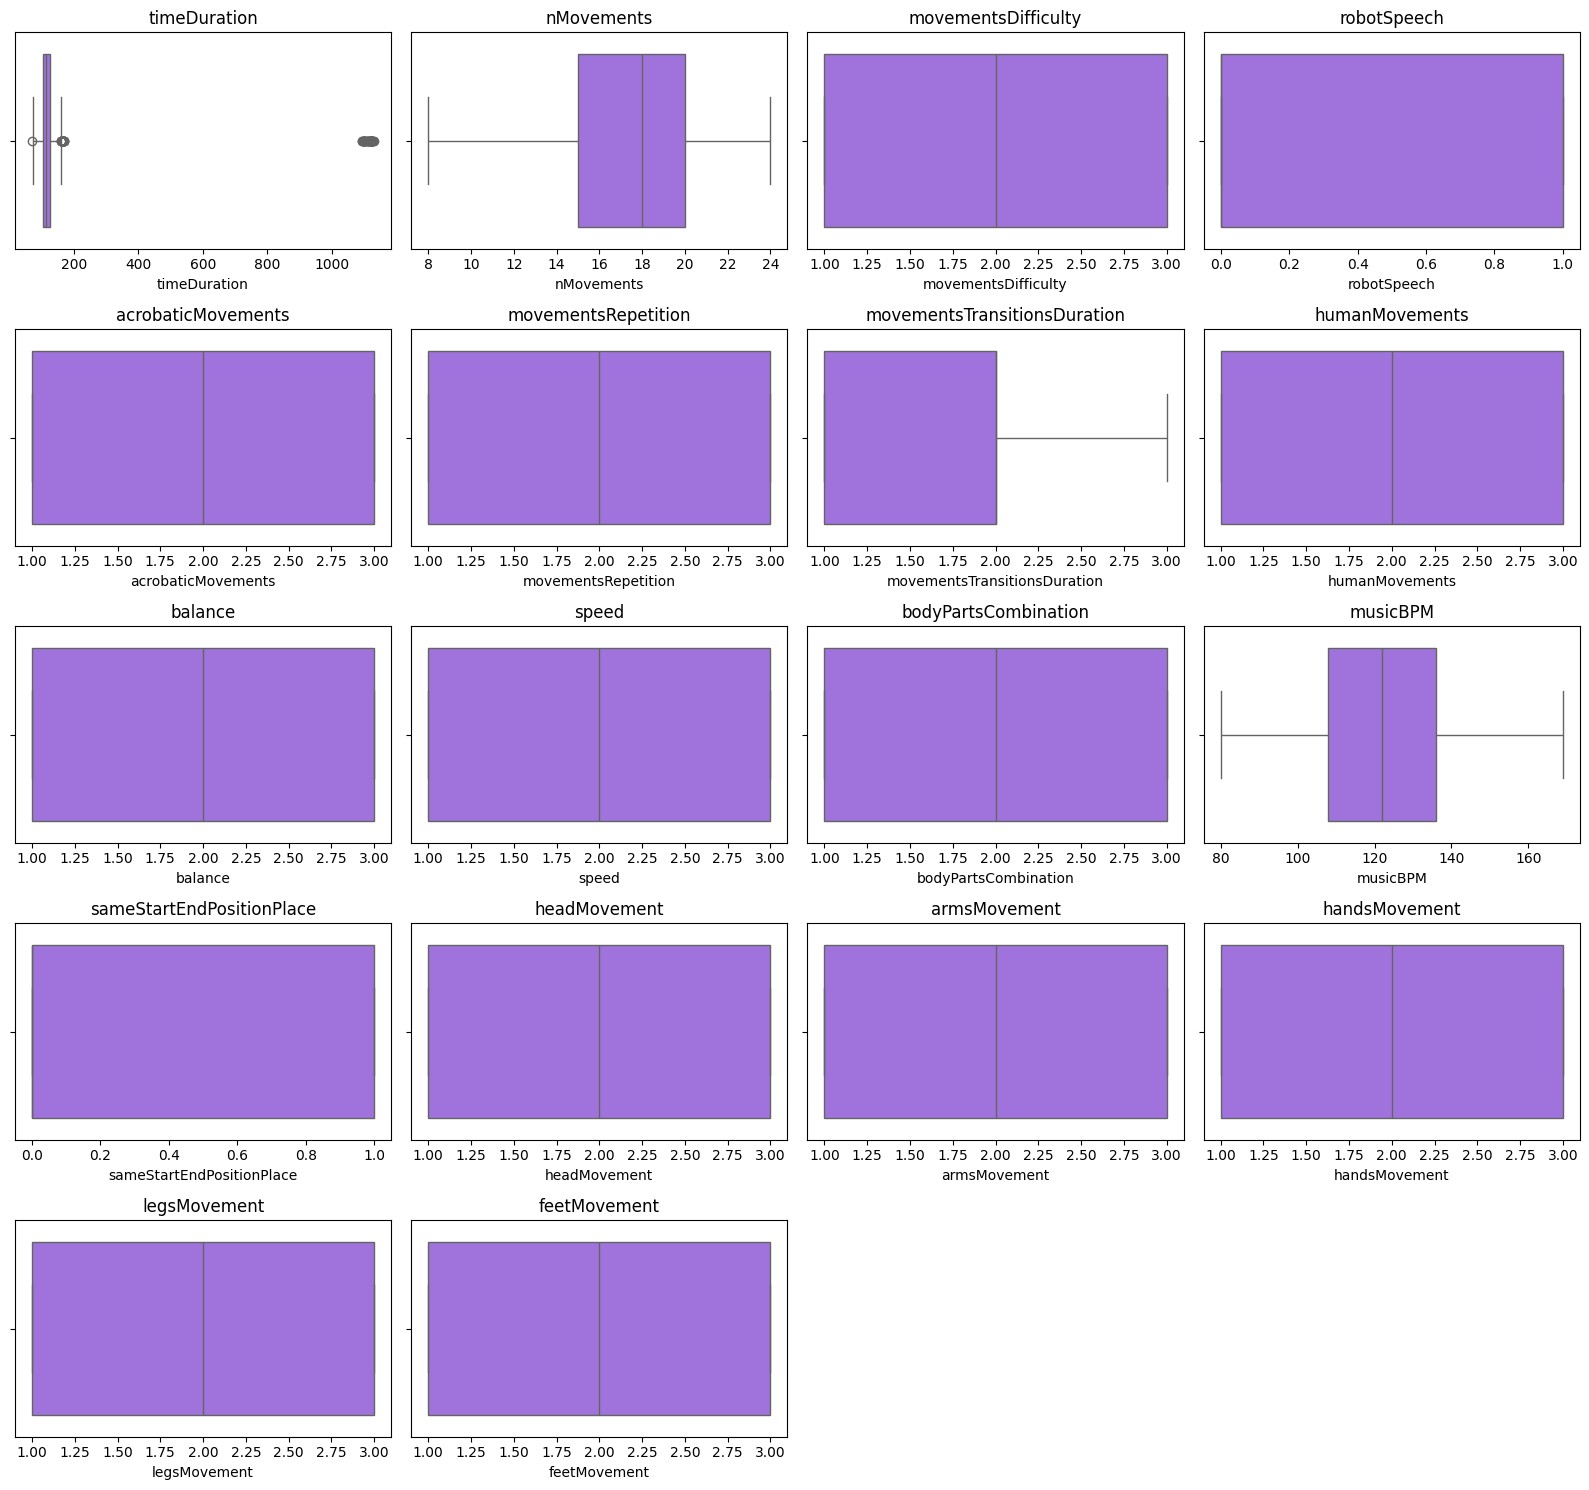

In [38]:
# ── Univariate BOXPLOTS ───────────────────────────
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.boxplot(x=df[col], ax=ax, color='#9d62ec')
    ax.set_title(col)

for ax in axes[total_plots-1:]:
    fig.delaxes(ax)

fig.tight_layout()

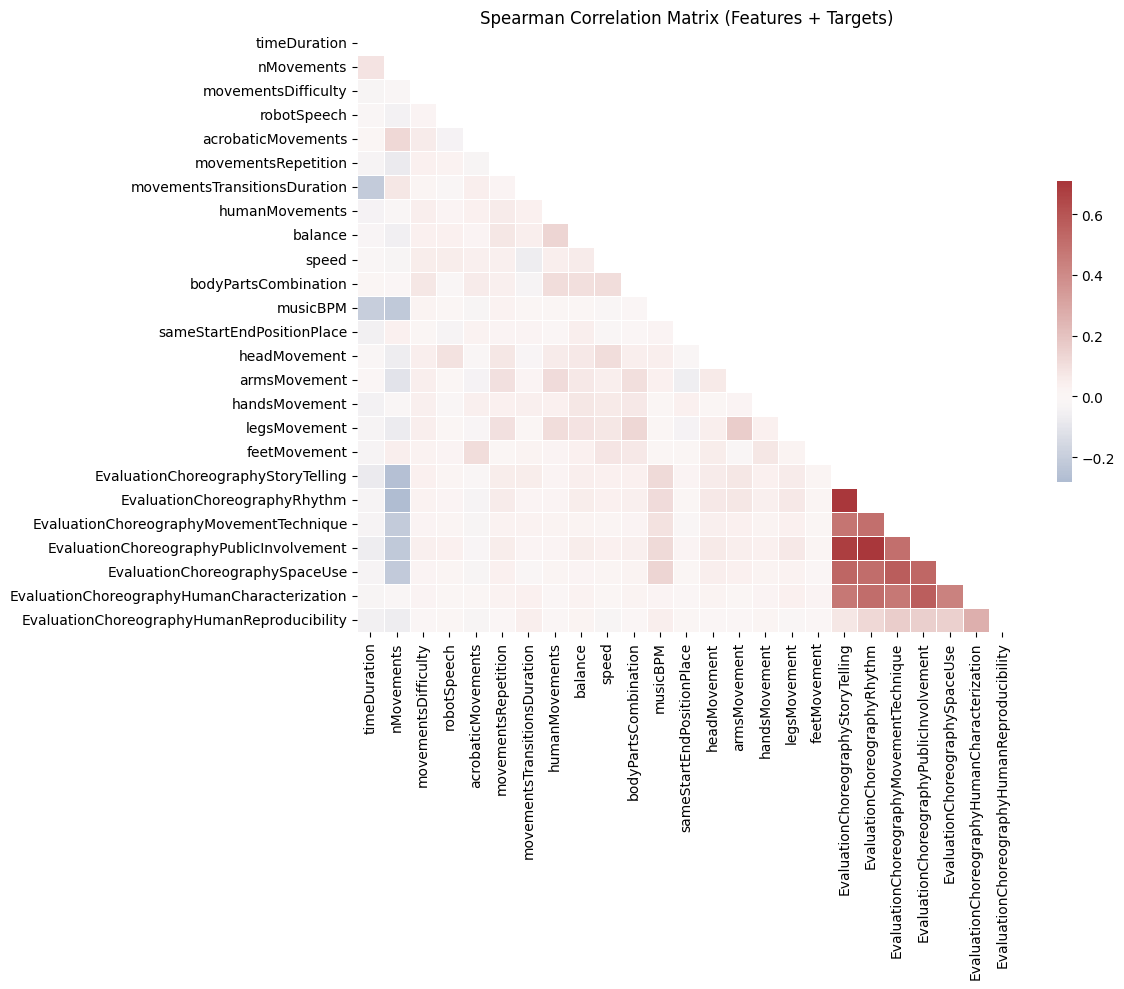

In [39]:
corr = df[numeric_cols + target_cols].corr(method='spearman')  
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, mask=mask, cmap='vlag', center=0,
    linewidths=0.5, cbar_kws={'shrink':0.5}
)
plt.title("Spearman Correlation Matrix (Features + Targets)")
plt.tight_layout()
plt.show()


In [40]:
feature_cols = [
    'timeDuration','nMovements','movementsDifficulty','robotSpeech',
    'acrobaticMovements','movementsRepetition', 'movementsTransitionsDuration','humanMovements','balance',
    'speed','bodyPartsCombination','musicBPM','sameStartEndPositionPlace',
    'headMovement','armsMovement','handsMovement','legsMovement','feetMovement'
]
feature_cols += genre_cols

In [41]:
with open("data/feature_cols.txt", "w") as f:
    for feat in feature_cols:
        f.write(feat + "\n")

In [42]:
# Create a dict of per-target DataFrames
datasets = {}
for tgt in target_cols:
    datasets[tgt] = df[feature_cols + [tgt]].copy()

for tgt, d in datasets.items():
    print(f"{tgt}: {d.shape[0]} rows, {d.shape[1]} cols")

EvaluationChoreographyStoryTelling: 8563 rows, 26 cols
EvaluationChoreographyRhythm: 8563 rows, 26 cols
EvaluationChoreographyMovementTechnique: 8563 rows, 26 cols
EvaluationChoreographyPublicInvolvement: 8563 rows, 26 cols
EvaluationChoreographySpaceUse: 8563 rows, 26 cols
EvaluationChoreographyHumanCharacterization: 8563 rows, 26 cols
EvaluationChoreographyHumanReproducibility: 8563 rows, 26 cols


### Target-Specific EDA

In [43]:

# Create binary class columns on the fly
for tgt in target_cols:
    df[f"{tgt} Class"] = (df[tgt] >= 4).astype(int)
     

/var/folders/x6/t819xn051hvgc3lldbwgshrr0000gn/T/ipykernel_16709/3929568940.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["1–3 → 0", "4–5 → 1"])
/var/folders/x6/t819xn051hvgc3lldbwgshrr0000gn/T/ipykernel_16709/3929568940.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["1–3 → 0", "4–5 → 1"])
/var/folders/x6/t819xn051hvgc3lldbwgshrr0000gn/T/ipykernel_16709/3929568940.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["1–3 → 0", "4–5 → 1"])
/var/folders/x6/t819xn051hvgc3lldbwgshrr0000gn/T/ipykernel_16709/3929568940.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

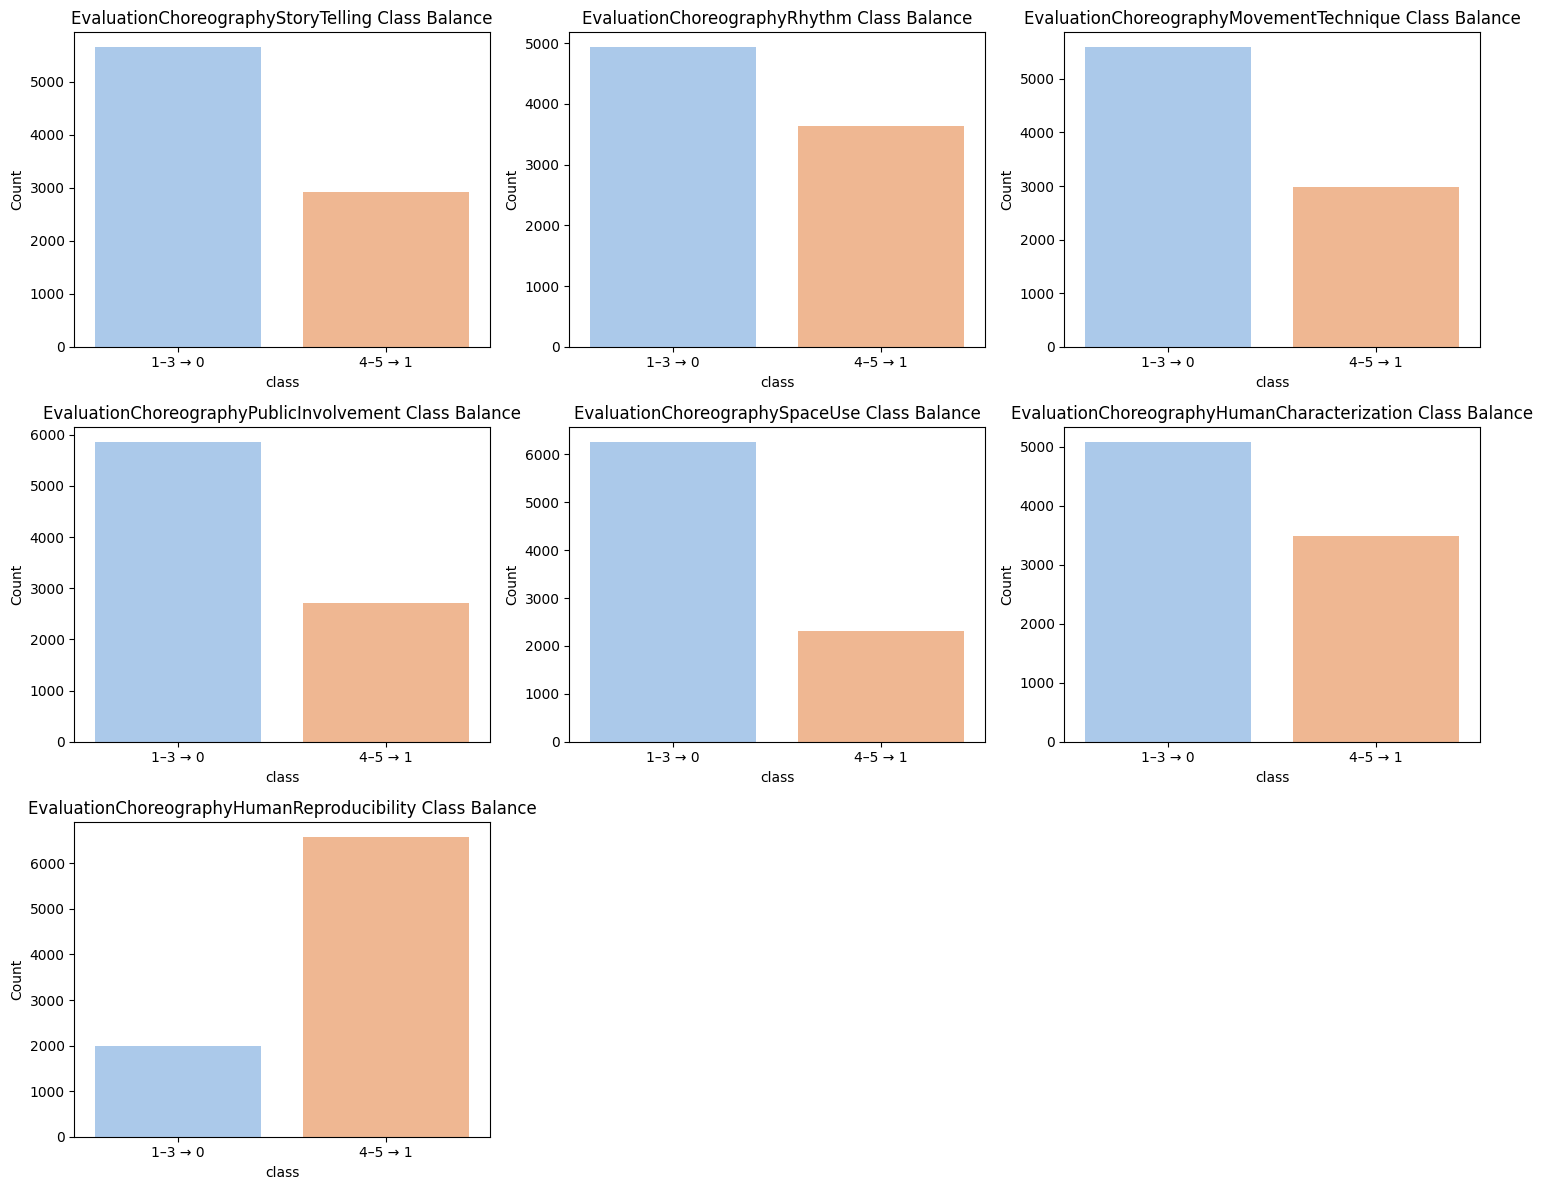

In [47]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (Recompute class columns if needed)
# for tgt in target_cols:
#     df[f"{tgt} Class"] = (df[tgt] >= 4).astype(int)

n = len(target_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for idx, tgt in enumerate(target_cols):
    ax = axes[idx]
    
    # Build a tiny DataFrame so that Seaborn can accept `hue='class'`
    counts = df[f"{tgt} Class"].value_counts().sort_index()
    df_counts = pd.DataFrame({
        "class": counts.index.astype(str),  # will be "0" or "1"
        "count": counts.values
    })
    
    sns.barplot(
        data=df_counts,
        x="class",
        y="count",
        hue="class",       # assign hue so palette is allowed
        palette="pastel",
        legend=False,
        ax=ax
    )
    ax.set_xticklabels(["1–3 → 0", "4–5 → 1"])
    ax.set_ylabel("Count")
    ax.set_title(f"{tgt} Class Balance")

# Turn off any unused subplots
for j in range(len(target_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


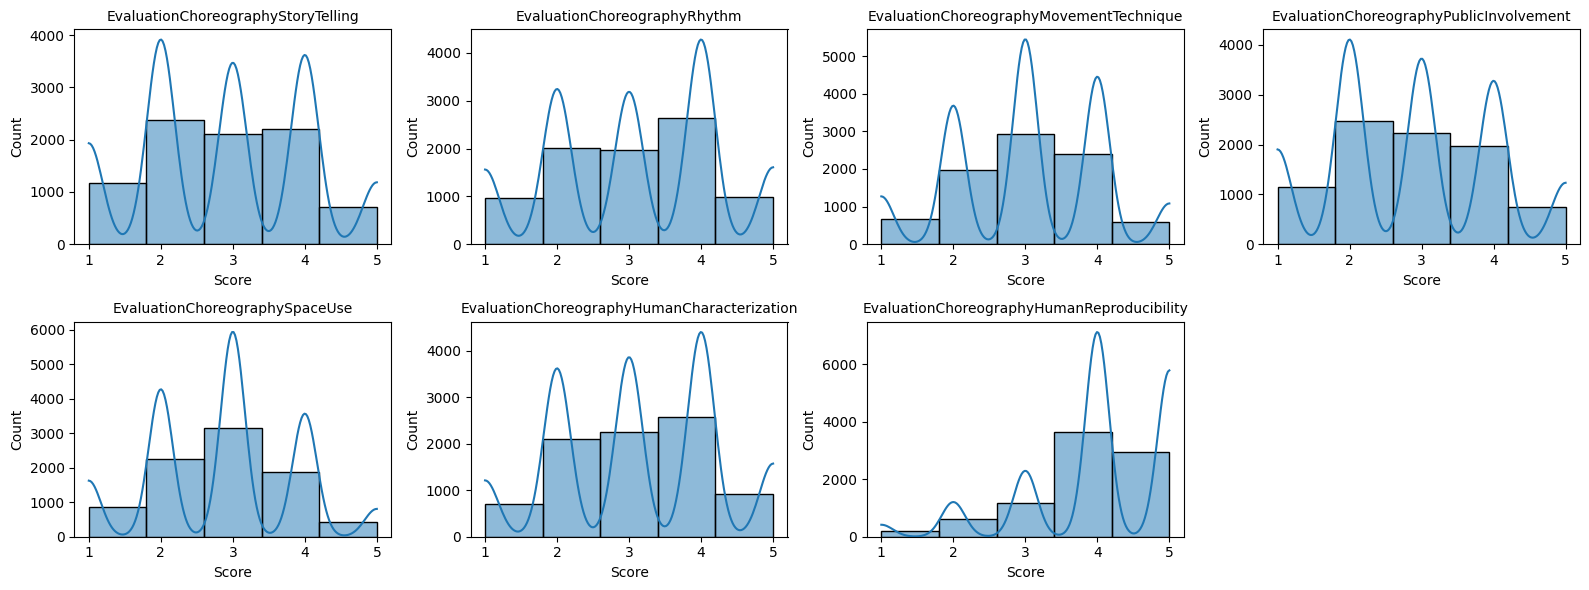

In [54]:
n = len(target_cols)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
axes = axes.flatten()

for ax, col in zip(axes, target_cols):
    sns.histplot(df[col], bins=5, kde=True, ax=ax)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

# Remove any unused subplots
for ax in axes[n:]:
    fig.delaxes(ax)

fig.tight_layout()
plt.show()

In [51]:
valid_numeric = [
    col
    for col in numeric_cols
    if df[col].nunique(dropna=True) > 1
]

# 2. Compute skewness & kurtosis
skew_df = pd.DataFrame({
    'skewness': df[valid_numeric].skew(),
    'kurtosis': df[valid_numeric].kurtosis()
})

# 3. Sort by absolute skew
skew_df = skew_df.sort_values('skewness', key=lambda s: s.abs(), ascending=False)

# 4. Flag “highly skewed” by |skewness| > 1 (heuristic)
high_skew = skew_df[skew_df['skewness'].abs() > 1].index.tolist()

print("Highly skewed features (|skew|>1):", high_skew)
display(skew_df)


Highly skewed features (|skew|>1): ['timeDuration']


,skewness,kurtosis
timeDuration,14.046105,207.230211
nMovements,-0.660217,-0.409172
movementsTransitionsDuration,0.439920,-0.984676
acrobaticMovements,0.176466,-1.532399
feetMovement,0.132525,-1.408406
armsMovement,-0.126281,-1.526480
speed,0.084470,-1.464361
humanMovements,-0.080716,-1.533216
sameStartEndPositionPlace,0.080659,-1.993960
legsMovement,-0.079825,-1.515184
